# Calculo Numérico 
### Deflexão máxima em viga


>**Discente**: Elison Maiko Oliveira
>
>**Matrícula**: 22102900
>
>


> **CHAPRA, CANALE - Numerical Methods for Engineering**
>
> **Exercíio 8.20, pag - 240 (pdf)**
>
>   Problema proposto:
>
> $$ y = \dfrac{Wo}{120EIL}\left(-x^{5}+ 2L^{2}x^{3}-xL^{4}\right)$$
>
> A deflexão máxima em viga é atingida no valor de X onde dy/dx = 0
>
> Usar: 
>
> L = 600 cm
>
> E = 50.000 kN∕cm2
>
> I = 30.000 cm4
>
> E e Wo = 2,5 kN∕cm
>


Seja :
        $$ F(x) = \dfrac{Wo}{120EIL}\left(-x^{5}+ 2L^{2}x^{3}-xL^{4}\right)$$

No interlavo que confere o tamanho da viga então [0,L] corresponde a [0,600] em cm


Considerando $$ \dfrac{Wo}{120EIL}$$ como uma constante após substituirmos os valores:





In [2]:
Wo = 2.5
L = 600
E = 30000
I = 50000

cte = Wo/(120*L*E*I)
ct2 = 600**4
print(f"Constante Ct: {cte}")
print(ct2)



Constante Ct: 2.3148148148148147e-14
129600000000


Logo:
        $$ F(x) = cte\left(-x^{5}+ 7200x^{3}-129600000000x\right)$$

Então temos que a derivada é:
        $$ F'(x) = cte\left(-5x^{4}+ 2160000x^{2}-129600000000\right)$$

Definiremos então:

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    ## produtos:  9
    ## somas : 2
    return cte*(-x*x*x*x*x + 7200*x*x*x - 129600000000*x)

def df(x):
    ## produtos: 7
    ## somas: 2
    return cte*(-5*x*x*x*x + 2160000*x*x - 129600000000)

print(df(300))
print(df(0))
print(df(599.999999))

0.0005625
-0.003
3.999999717429832e-11


(-0.005, 0.005)

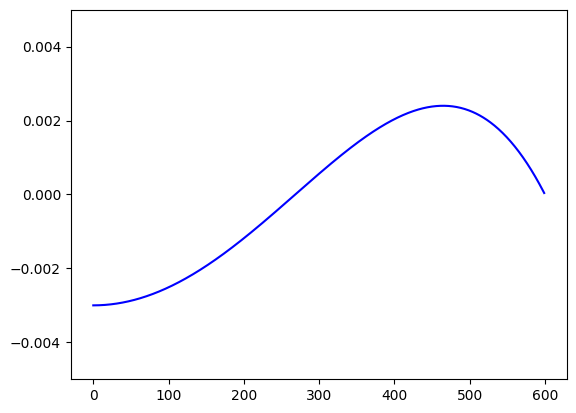

In [50]:
x = np.array(range(600)) ## Pois só nos interessa a parte da equação que se verifica ao longo do comprimento da viga
dom = np.linspace(np.min(x),np.max(x),1000)
im = [df(t) for t in dom]

plt.plot(dom,im,'b')
plt.ylim(-0.005, 0.005)
 



> Segundo o gráfico da função DF existem 2 raizes ao longo do comprimento da viga L
> Um deles é o prórpio extremo L=600, logo acharemos o outro
>
>**Tempo de execução com o Metodo da BISSECAO:**
>



In [11]:
%%timeit

a=0
b=600
x = (a+b)/2
fa =df(a)
while abs(a-b)>2**(-30):
    
    val = df(x)

    if val*fa > 0:
        a = x
        fa = val
    else:
        b=x

    x = (a+b)/2



60.7 µs ± 8.42 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


>**Output, precisao, e numero de operações com o Metodo da BISSECAO** 


In [13]:
##=========================IMPRESSÃO DE VALORES==========================

a=0
b=600
x = (a+b)/2
somas = 1
produtos = 1
comparacao = 0
fa = df(a)
somas += 2
produtos +=7


while abs(a-b)>2**(-30):
    value = df(x)
    if value*fa > 0:
        a = x
        fa = value
    else:
        b=x
    comparacao+=2 #TOTAL POR CICLO
    x = (a+b)/2
    somas+=4      #TOTAL
    produtos+=9   #TOTAL


print(f"Precisão obtida: {value}")
print(f"valor da raiz: {x}")
print(f"Número total de somas: {somas}")
print(f"Número total de produtos: {produtos}")
print(f"Número total de comparações: {comparacao}")



Precisão obtida: -6.993258440936053e-15
valor da raiz: 268.3281572998567
Número total de somas: 163
Número total de produtos: 368
Número total de comparações: 80


# Metodo de Newton

O processo de achar a raiz se deu na função **df** referente a segunda derivada, logo, para aplicarmos o método de Newton em df, precisamos da **ddf** que equivale a derivada da segunda da função inicial obtida


Funcial Inicial:
        $$ F(x) = cte\left(-x^{5}+ 7200x^{3}-129600000000x\right)$$

Derivada de F:
        $$ F'(x) = cte\left(-5x^{4}+ 2160000x^{2}-129600000000\right)$$

Derivada da segunda de F:
        $$ F''(x) = cte\left(-20x^{3}+ 4320000x\right)$$


$$ X_{n+1} = X_n - \dfrac{F'(x)}{F''(x)}$$

>Definindo ddf(x):


In [15]:
def ddf(x):
    # somas: 1
    # produtos: 5
    return cte*(-20*x*x*x + 4320000*x)

> Tomando uma aproximação de 250 e iniciando com um chute aleatório de 432, temos;

In [45]:
%%timeit

x_ant = 432
x_aprox = 250

while abs(x_ant-x_aprox)>2**-30:
    x_ant = x_aprox
    x_aprox = x_aprox - (df(x_aprox)/ddf(x_aprox))


7.7 µs ± 1.64 µs per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
